## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [83]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random


# Part 1. Linear regression model

## Load regression data

In [84]:
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

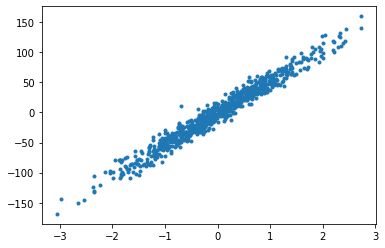

In [85]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [86]:
msError = []

def meanSquareError(test, predicts):
    total = 0
    # summation of the squared errors
    for i in range(len(predicts)):
        total += ((test[i] - predicts[i]) ** 2)
    # get the average value
    avgError = total / float(len(predicts))
    return avgError
    
def trainLinearRegression(X, Y):  
    # Assume y = ax + b, a is the slope, b is the intercept
    # randomly initialize the weight a & intercept b
    a = random.random()
    b = random.random()

    # initialize the learning rate and number of epoch
    learningRate = 0.001
    epoch = 10000

    # learn in each epoch
    n = len(X)
    for i in range(epoch):
        gradientA = 0
        gradientB = 0
        # get the summation for gradient
        for j in range(n):
            gradientA += (-2/n) * X[j] * (Y[j] - (a * X[j] + b))
            gradientB += (-2/n) * (Y[j] - (a * X[j] + b))
        # update the weight and intercept
        a -= learningRate * gradientA
        b -= learningRate * gradientB
        # checking if loss function converges
        msError.append(meanSquareError(Y, a * X + b))

    # return the trained weight and intercept
    return a, b
    
def lineLinearRegression(xTest):
    # return the line y = ax + b
    A, B = trainLinearRegression(x_train, y_train)
    print("Weight:", A, "Intercept:", B)
    predictedY = A * xTest + B
    return predictedY

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

Weight: [52.74354002] Intercept: [-0.33375898]
Mean Square Error: [110.4381912]


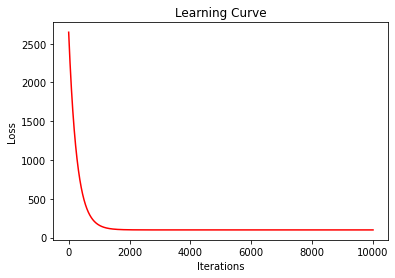

In [87]:
y_pred = lineLinearRegression(x_test)
print("Mean Square Error:", meanSquareError(y_test, y_pred))
# draw the learning curve
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
itr = range(0, 10000)
plt.plot(itr, msError, 'red')

# Part 2. Logistic regreesion model

## Load classification data

In [88]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

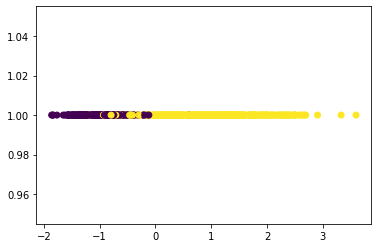

In [89]:
plt.scatter(x_train, np.ones_like(x_train), c=y_train)

In [90]:
ceError = []

def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

def crossEntropyError(test, predicts):
    total = 0
    for i in range(len(predicts)):
        total += (test[i] * np.log(predicts[i]) + (1 - test[i]) * (np.log(1 - predicts[i])))
    error = -1 * total
    return error

def trainLogisticRegression(X, Y):
    # Assume y = ax + b, a is the slope, b is the intercept
    # randomly initialize the weight a & intercept b
    samples, features = X.shape
    a = np.zeros(features)
    b = random.random()
    
    # initialize the learning rate and number of epoch
    learningRate = 0.01
    epoch = 9000

    # learn in each epoch
    for i in range(epoch):
        # predict for every epoch
        predictedY = sigmoid(np.dot(X, a) + b)
        gradientA = np.zeros(features)
        gradientB = 0
        # get the summation for gradient
        for j in range(samples):
            gradientA += (-2/samples) * X[j] * (Y[j] - predictedY[j])
            gradientB += (-2/samples) * (Y[j] - predictedY[j])
        # update the weight and intercept
        a -= learningRate * gradientA
        b -= learningRate * gradientB
        # checking if loss function converges
        ceError.append(crossEntropyError(Y, predictedY))

    # return the trained weight and intercept
    return a, b

def classify(xTest):
    A, B = trainLogisticRegression(x_train, y_train)
    print("Weight:", A, "Intercept:", B)
    predictedY = sigmoid(np.dot(xTest, A) + B)
    return predictedY

Weight: [4.32572715] Intercept: 1.3772571724013523
Cross Entropy Error: 45.646631599949025


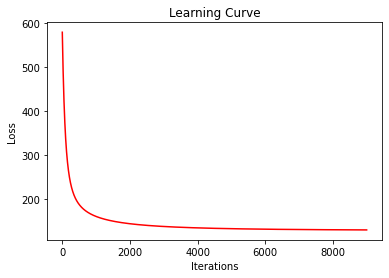

In [91]:
y_pred = classify(x_test)
print("Cross Entropy Error:", crossEntropyError(y_test, y_pred))
# draw the learning curve
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
itr = range(0, 9000)
plt.plot(itr, ceError, 'red')